# Plot Monte Carlo quantities

Plot some distributions for mc15 data

In [29]:
from ProfileTools import profiles
from Gaugi.monet.utils import getColor
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.AtlasStyle import *
from ROOT import TCanvas
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure
from pprint import pprint
import numpy as np
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
SetAtlasStyle()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

Applying ATLAS style settings...


## Fill all histograms:

In [30]:
etbins = [15, 20, 30, 40, 50, 1000000]
etabins = [0.0, 0.8, 1.37, 1.54, 2.50]

In [33]:
path = '/Volumes/castor/cern_data/files/Zee/mc15_13TeV.sgn.probes_lhmedium_Zee.bkg.Truth.JF17.oldgrid/'
path+= 'mc15_13TeV.sgn.probes_lhmedium_Zee.bkg.Truth.JF17.oldgrid_et{ET}_eta{ETA}.npz'
paths = [[ path.format(ET=et,ETA=eta) for eta in range(5)] for et in range(5)]  

In [34]:
from Gaugi import load
features = load(paths[0][0])['features']
print(features)

['avgmu' 'L2Calo_ring_0' 'L2Calo_ring_1' 'L2Calo_ring_2' 'L2Calo_ring_3'
 'L2Calo_ring_4' 'L2Calo_ring_5' 'L2Calo_ring_6' 'L2Calo_ring_7'
 'L2Calo_ring_8' 'L2Calo_ring_9' 'L2Calo_ring_10' 'L2Calo_ring_11'
 'L2Calo_ring_12' 'L2Calo_ring_13' 'L2Calo_ring_14' 'L2Calo_ring_15'
 'L2Calo_ring_16' 'L2Calo_ring_17' 'L2Calo_ring_18' 'L2Calo_ring_19'
 'L2Calo_ring_20' 'L2Calo_ring_21' 'L2Calo_ring_22' 'L2Calo_ring_23'
 'L2Calo_ring_24' 'L2Calo_ring_25' 'L2Calo_ring_26' 'L2Calo_ring_27'
 'L2Calo_ring_28' 'L2Calo_ring_29' 'L2Calo_ring_30' 'L2Calo_ring_31'
 'L2Calo_ring_32' 'L2Calo_ring_33' 'L2Calo_ring_34' 'L2Calo_ring_35'
 'L2Calo_ring_36' 'L2Calo_ring_37' 'L2Calo_ring_38' 'L2Calo_ring_39'
 'L2Calo_ring_40' 'L2Calo_ring_41' 'L2Calo_ring_42' 'L2Calo_ring_43'
 'L2Calo_ring_44' 'L2Calo_ring_45' 'L2Calo_ring_46' 'L2Calo_ring_47'
 'L2Calo_ring_48' 'L2Calo_ring_49' 'L2Calo_ring_50' 'L2Calo_ring_51'
 'L2Calo_ring_52' 'L2Calo_ring_53' 'L2Calo_ring_54' 'L2Calo_ring_55'
 'L2Calo_ring_56' 'L2Calo_ring_57' '

In [35]:
def generator_for_signal(path):
    from Gaugi import load
    raw = load(path)
    features = raw['features'].tolist()
    data = raw['data']
    target =  raw['target']
    return data[target==1,:], features

In [36]:
from collections import OrderedDict
layers = OrderedDict([ ('PS', 8),
                       ('EM1', 64),
                       ('EM2', 8),
                       ('EM3', 8),
                       ('HAD1', 4),
                       ('HAD2', 4),
                       ('HAD3', 4) ])

def ringParser(idx):
    cTotal = 0
    for key, nRings in layers.items():
        if idx < cTotal+nRings: break
        cTotal += nRings
    return 'Ring_{(%s,%d;%d)} [MeV]' % (key, idx-cTotal, idx)

In [37]:
from ProfileTools import ringLowerEdges, ringHighEdges, ringNBins
from ProfileTools import standardQuantitiesLowerEdges, standardQuantitiesHighEdges, standardQuantitiesNBins
from ProfileTools import electronQuantities

profile = profiles(etbins, etabins)

for key in ['f1','f3','eratio','reta','weta2']:
    profile.add_hist('L2Calo_'+key, standardQuantitiesNBins[key], 
                                     standardQuantitiesLowerEdges[key],
                                     standardQuantitiesHighEdges[key], 
                                     electronQuantities[key]) 
ring = 9
profile.add_hist('L2Calo_ring_%d'%ring, ringNBins[ring], ringLowerEdges[ring],ringHighEdges[ring], ringParser(ring))

In [38]:
hists = profile.fill( generator_for_signal, paths)

Reading... |############################################################| 20/20
Reading... ... finished task in 15.985432s.


## Make some plots:

In [39]:
def PlotHist( hist_list , xlabel, these_fill_colors, these_line_colors, y_axis_maximum=1 , these_markers=None):
    from Gaugi.monet.utils import NormHist
    # Create canvas
    canvas = TCanvas('canvas','canvas',700, 500)

    for idx, hist in enumerate(hist_list):
        h = NormHist(hist)
        h.SetMaximum(y_axis_maximum)
        if these_markers: 
            h.SetMarkerColor(these_fill_colors[idx])
            AddHistogram(canvas,h, 'p', markerStyle=these_markers[idx])
        else:
            h.SetLineColor(these_line_colors[idx])
            h.SetFillColor(these_fill_colors[idx])
            AddHistogram(canvas,h, 'same')
    FormatCanvasAxes(canvas, XLabelSize=16, YLabelSize=16, XTitleOffset=0.87, ZLabelSize=16,
                             ZTitleSize=16, YTitleOffset=1.10, ZTitleOffset=1.1)
    SetAxisLabels(canvas,xlabel, 'counts/bin (norm by counts)')
    return canvas

In [49]:
def AddLegend(canvas, x, y, legends, option='f'):
    MakeLegend( canvas,x,y,x+0.98,y+0.30,textsize=16, names=legends, option = option )

In [41]:
baseColor_black = np.array([10,10,10],dtype=np.float_)/255 
baseColor_red = np.array([255,10,10],dtype=np.float_)/255 
baseColor_blue = np.array([124,124,255],dtype=np.float_)/255

def getColors(outColors, transparency=None):
    from ROOT import TColor
    colors = [TColor.GetColor(r, g, b) for r, g, b in zip(*outColors)]
    if transparency:
        colors = [ TColor.GetColorTransparent( color, transparency ) for color in colors]
    return colors

def colorGradient(color1, color2, nSteps, smoothThres=None, transparency=None):
    import numpy as np
    color1 = np.array(color1)
    color2 = np.array(color2)
    deltas = color2 - color1
    deltaSum = sum(abs(deltas))
    if smoothThres is not None and deltaSum/nSteps>smoothThres:
        color2 = color1 + deltas*smoothThres*nSteps/deltaSum
    outColors = [np.linspace(pcolor1,pcolor2,nSteps) for pcolor1, pcolor2 in zip(color1,color2)]
    outColors = getColors(outColors, transparency=transparency)
    return outColors

def fadeToBlack(color1, nSteps=None, smoothThres=None, transparency=None):
    if nSteps is None: 
        smoothThres = 0.4; nSteps = 1
    return colorGradient(color1,[0,0,0], nSteps, smoothThres,transparency)

def fadeToWhite(color1, nSteps, smoothThres=None, transparency=None ):
    if nSteps is None: 
        smoothThres = 0.4; nSteps = 1
    return colorGradient(color1,[1,1,1], nSteps, smoothThres, transparency)

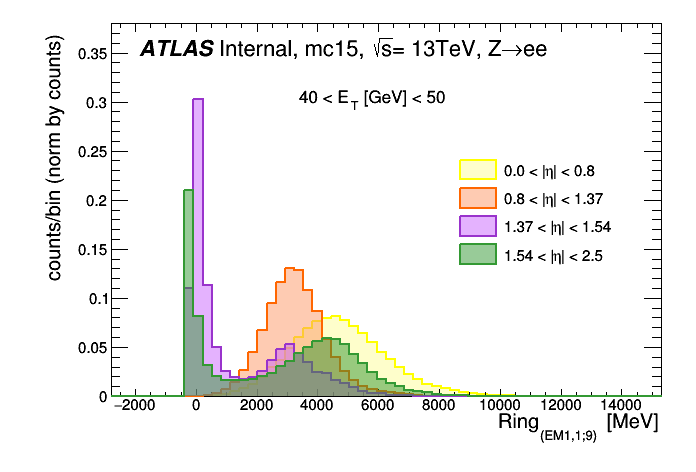

In [45]:
fill_colors = [getColor(color, 0.5) for color in [kYellow-9, kOrange+6, kViolet-4, kGreen-2, kAzure-8] ]
line_colors = [kYellow, kOrange+7, kViolet-5, kGreen-2, kAzure+4]
et_bin = 3
texlabel = profile.get_str_etbin(et_bin)
legends = [ profile.get_str_etabin(idx) for idx in range(4) ]
branch = 'L2Calo_ring_9'
hist_list = [ hists[branch][et_bin][eta_bin] for eta_bin in range(len(etabins)-1) ]
canvas = PlotHist( hist_list, ringParser(9), fill_colors, line_colors,0.38)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, mc15, #sqrt{s}= 13TeV, Z#rightarrowee')
AddTexLabel(canvas, 0.43, 0.78, texlabel, textsize=0.04)
AddLegend( canvas,0.65,0.43, legends)
canvas.Draw()
canvas.SaveAs('mc15_zee_L2Calo_ring_9_et3_etaComp.pdf')

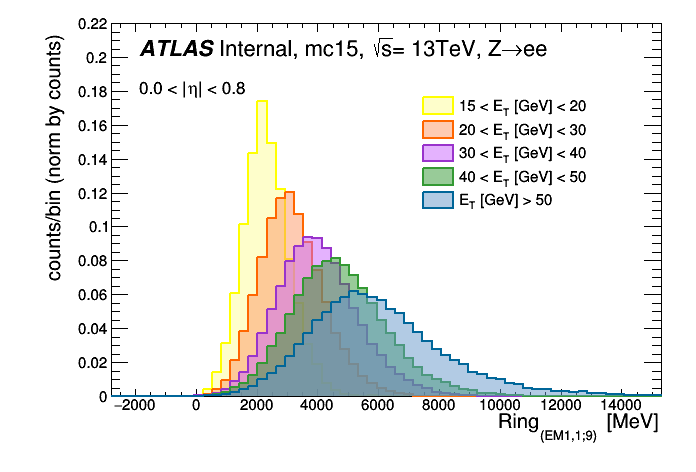

In [46]:
branch = 'L2Calo_ring_9'
eta_bin = 0
fill_colors = [getColor(color, 0.5) for color in [kYellow-9, kOrange+6, kViolet-4, kGreen-2, kAzure-8] ]
line_colors = [kYellow, kOrange+7, kViolet-5, kGreen-2, kAzure+4]
texlabel = profile.get_str_etabin(eta_bin)
legends = [ profile.get_str_etbin(idx) for idx in range(5) ]
legends[-1] = 'E_{T} [GeV] > 50' #Fix latex. For some reason the jupyter is not be able to handle this!
hist_list = [ hists[branch][et_bin][eta_bin] for et_bin in range(len(etbins)-1) ]
canvas = PlotHist( hist_list, ringParser(9), fill_colors, line_colors,0.22)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, mc15, #sqrt{s}= 13TeV, Z#rightarrowee')
AddTexLabel(canvas, 0.2, 0.8, texlabel, textsize=0.04)
AddLegend( canvas,0.6,0.55, legends)
canvas.Draw()
canvas.SaveAs('mc15_zee_L2Calo_ring_9_eta0_etComp.pdf')

## Second style:

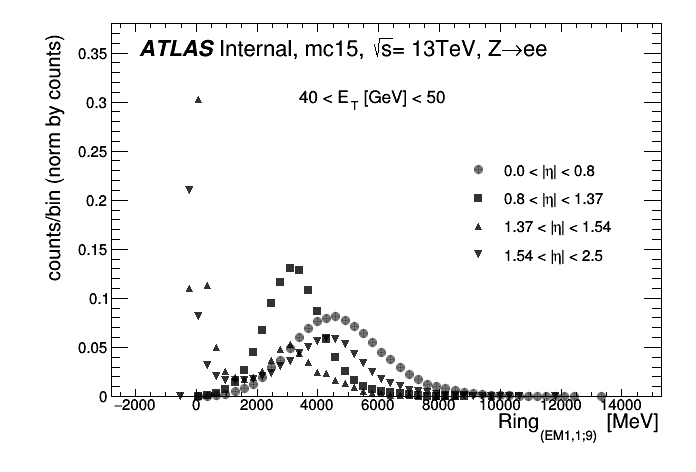

In [52]:
et_bin = 3
markers = list(range(20, 25))
texlabel = profile.get_str_etbin(et_bin)
legends = [ profile.get_str_etabin(idx) for idx in range(4) ]
fill_colors = fadeToBlack(baseColor_black, 4, transparency=0.8)
line_colors = fadeToBlack(baseColor_black, 4, transparency=0.8)
branch = 'L2Calo_ring_9'
hist_list = [ hists[branch][et_bin][eta_bin] for eta_bin in range(len(etabins)-1) ]
canvas = PlotHist( hist_list, ringParser(9), fill_colors, line_colors,0.38, these_markers=markers)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, mc15, #sqrt{s}= 13TeV, Z#rightarrowee')
AddTexLabel(canvas, 0.43, 0.78, texlabel, textsize=0.04)
AddLegend( canvas,0.65,0.43, legends, option='p')
canvas.Draw()
canvas.SaveAs('mc15_zee_oldgrid_L2Calo_ring_9_et3_etaComp.pdf')

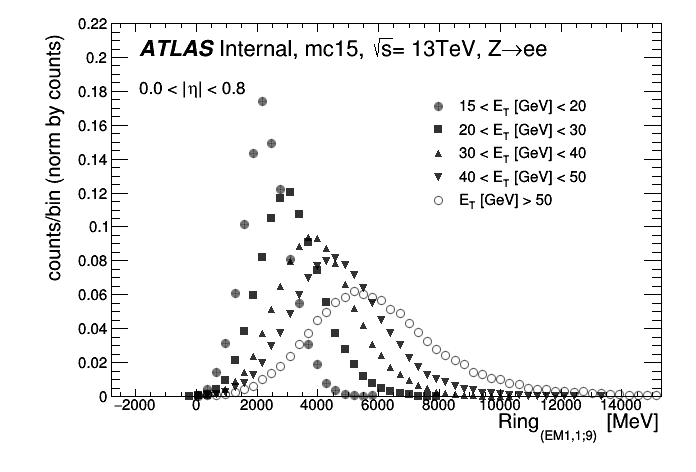

In [53]:
branch = 'L2Calo_ring_9'
eta_bin = 0
markers = list(range(20, 25))
colors = fadeToBlack(baseColor_black, 5, transparency=0.8)
texlabel = profile.get_str_etabin(eta_bin)
legends = [ profile.get_str_etbin(idx) for idx in range(5) ]
legends[-1] = 'E_{T} [GeV] > 50' #Fix latex. For some reason the jupyter is not be able to handle this!
hist_list = [ hists[branch][et_bin][eta_bin] for et_bin in range(len(etbins)-1) ]
canvas = PlotHist( hist_list, ringParser(9), colors, line_colors,0.22 , these_markers=markers)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, mc15, #sqrt{s}= 13TeV, Z#rightarrowee')
AddTexLabel(canvas, 0.2, 0.8, texlabel, textsize=0.04)
AddLegend( canvas,0.6,0.55, legends, option='p')
canvas.Draw()
canvas.SaveAs('mc15_zee_oldgrid_L2Calo_ring_9_eta0_etComp.pdf')